# Stochastic Simulation Algorithm

$\dot{x} = G(\gamma_{2}) + B(\beta_{2}) + x(\alpha_2 - \gamma - \beta)$

$\dot{G} = x(\gamma) + B(\alpha) - G(\gamma_{2})$

$\dot{B} = x(\beta) - B(\alpha + \beta_{2})$



Where x represent the fly moving, G making the good choice, B making the bad choice.

<IPython.core.display.Javascript object>


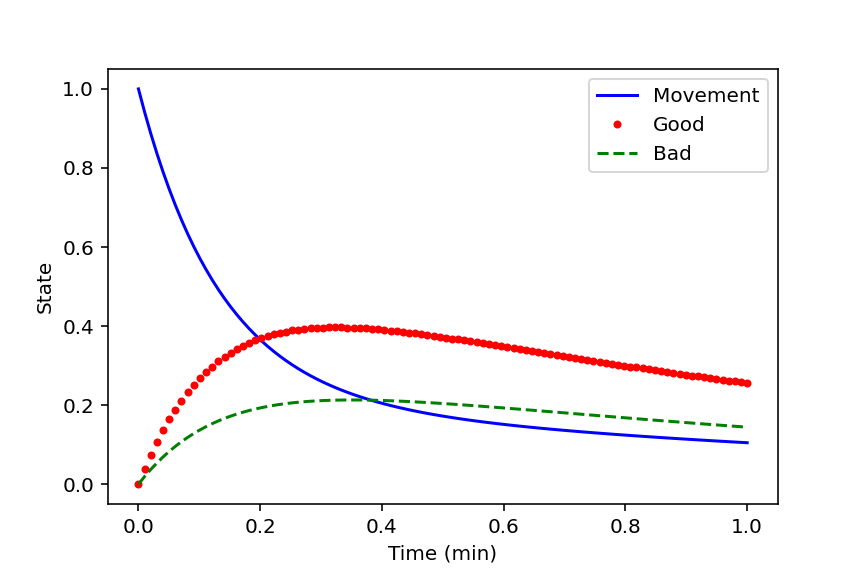

In [315]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random 


def eq(theta,t=0):
    #parameters
    x, G, B = theta
    #print(x,G,B)
    gamma = 4  # Cognition
    gamma2 = 1 # New choice
    beta = 2 # Bad choice
    beta2 = 2 # New Choice
    alpha = 1 # From bad to good
    alpha2 = 1
    C = 1 - gamma2 - alpha2 # Cognition2
    
    mu = 0
    sigma = 1
    
    s = np.random.normal(mu, sigma, 1)[0]
    
    
    #ODE
    dxdt = (G*(gamma2) + B*(beta2) + x*(- gamma - beta)) #+ s
    dGdt = x*(gamma)  + G*(C - gamma2-alpha2) + B*alpha #+ s
    dBdt = x*(beta) - B*(beta2 + alpha*2) + G*alpha2 #+ s
        
    return [dxdt, dGdt, dBdt]
    

# integrate the equations
t = np.linspace(0,1,100) # times to report solution
# initial conditions for height


x0 = 1
B0 = 0
G0 = 0

y0 =[x0,G0, B0]

y = odeint(eq,y0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r.')
plt.plot(t,y[:,2],'g--')
plt.xlabel('Time (min)')
plt.ylabel('State')
plt.legend(['Movement','Good','Bad'])
plt.show()

<IPython.core.display.Javascript object>


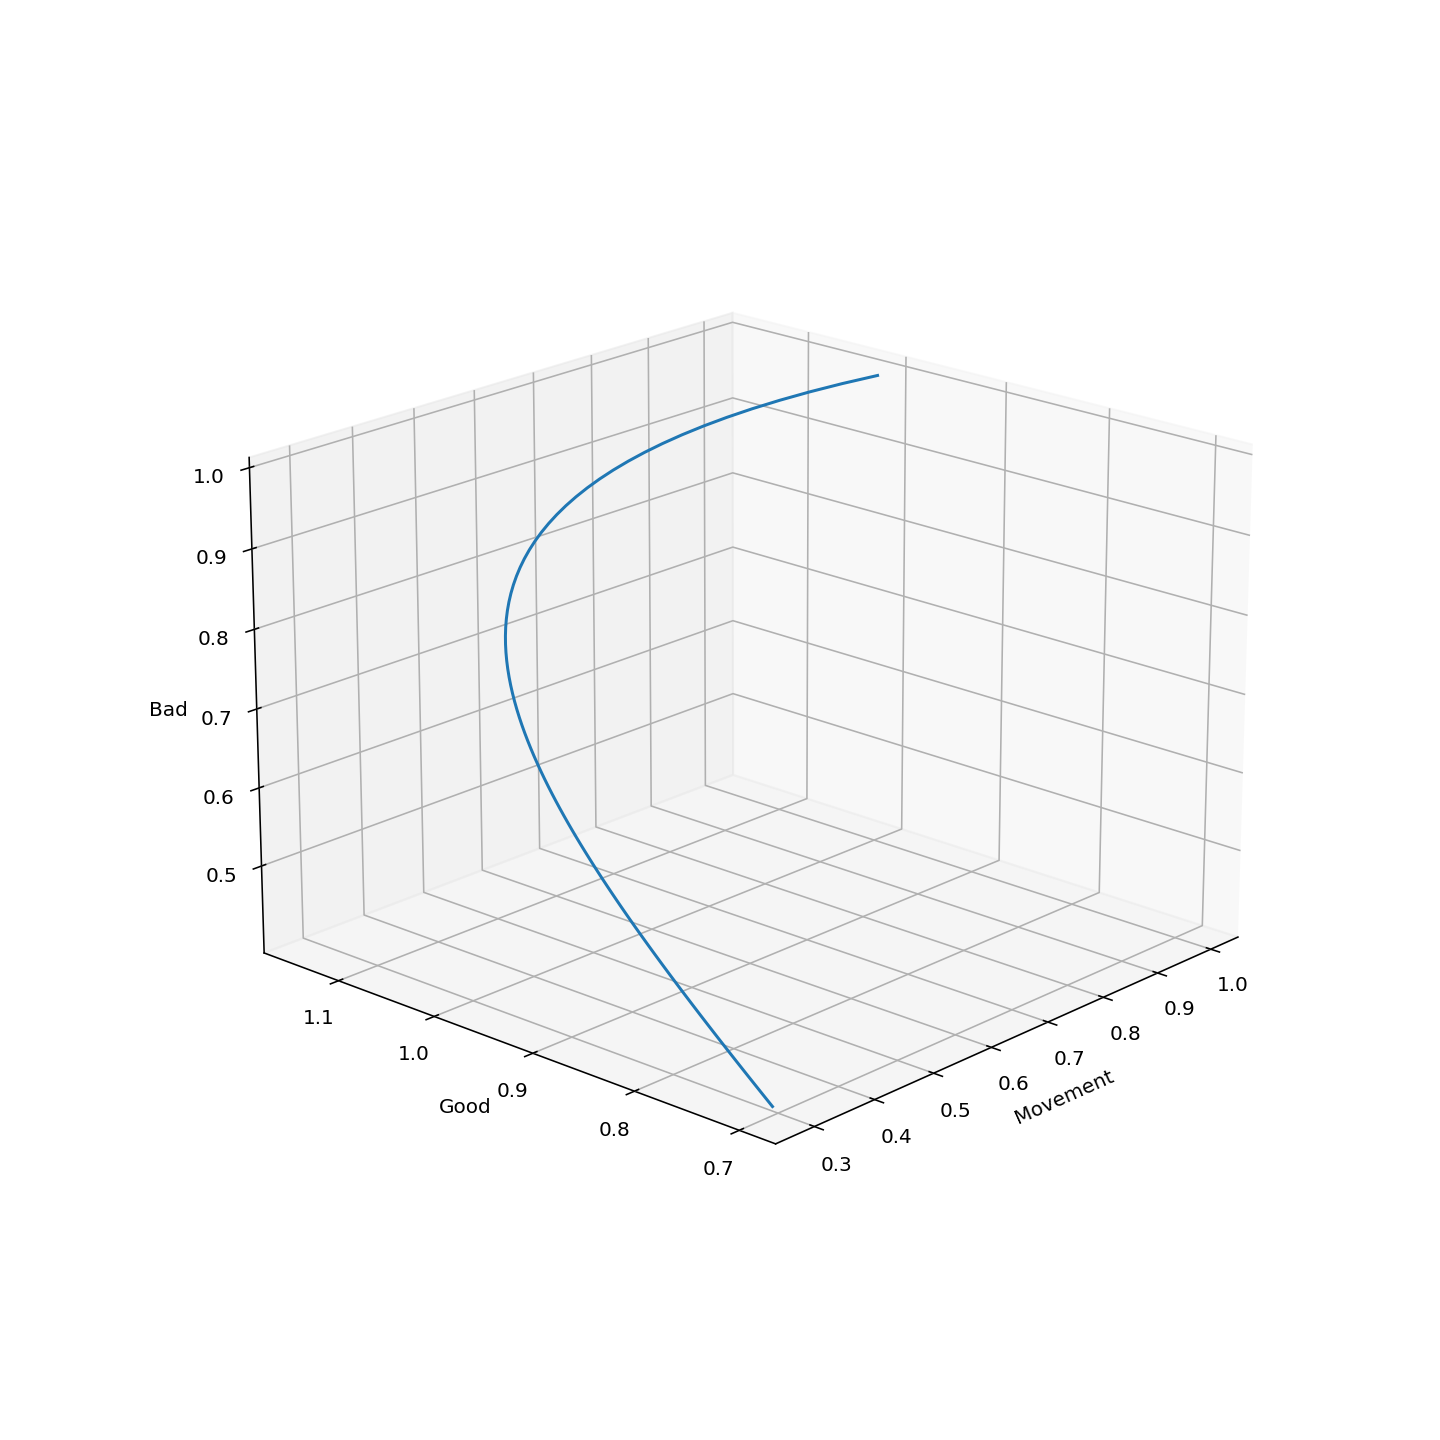

Text(0.5, 0, 'Bad')

In [306]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.plot3D(y[:,0],y[:,1],y[:,2])

ax.set_xlabel("Movement")
ax.set_ylabel('Good')
ax.set_zlabel('Bad')

<IPython.core.display.Javascript object>


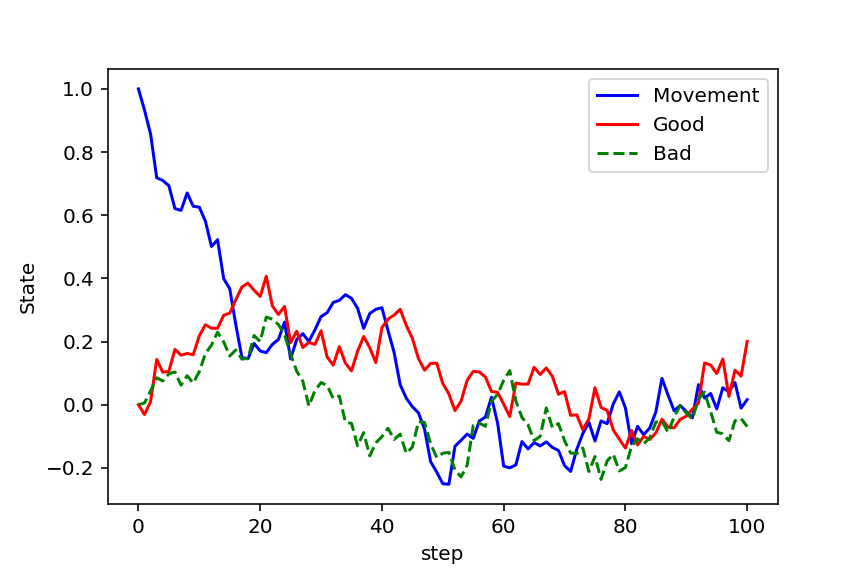

In [330]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random 


def eq(theta,t=0):
    #parameters
    x, G, B = theta
    #print(x,G,B)
    gamma = 4  # Cognition
    gamma2 = 1 # New choice
    beta = 2 # Bad choice
    beta2 = 2 # New Choice
    alpha = 1 # From bad to good
    alpha2 = 1
    C = 1 - gamma2 - alpha2 # Cognition2
    
    mu = 0
    sigma = 1
    
    s = np.random.normal(mu, sigma, 1)[0]
    
    
    #ODE
    dxdt = (G*(gamma2) + B*(beta2) + x*(- gamma - beta)) #+ s
    dGdt = x*(gamma)  + G*(C - gamma2-alpha2) + B*alpha #+ s
    dBdt = x*(beta) - B*(beta2 + alpha*2) + G*alpha2 #+ s
        
    return [dxdt, dGdt, dBdt]
    

# integrate the equations
t = np.linspace(0,1,100) # times to report solution
# initial conditions for height


x0 = 1
B0 = 0
G0 = 0

y0 =[x0,G0, B0]


    

# integrate the equations
t = np.linspace(0,100,100) # times to report solution
# initial conditions for height


dt = 0.01
num_steps = 100

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (1, 0, 0)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = eq([xs[i], ys[i], zs[i]])
    xs[i + 1] = xs[i] + (x_dot * dt) + np.random.normal(0,.05)
    ys[i + 1] = ys[i] + (y_dot * dt)+ np.random.normal(0,.05)
    zs[i + 1] = zs[i] + (z_dot * dt)+ np.random.normal(0,.05)

    



# plot results
plt.figure(1)
plt.plot(range(len(xs)),xs,'b-')
plt.plot(range(len(xs)),ys,'r-')
plt.plot(range(len(xs)),zs,'g--')
plt.xlabel('step')
plt.ylabel('State')
plt.legend(['Movement','Good','Bad'])
plt.show()
    


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def tank(h,t):
   # constants
   c1 = 0.13
   c2 = 0.20
   Ac = 2      # m^2
   # inflow
   qin = 0.5   # m^3/hr
   # outflow
   qout1 = c1 * h[0]**0.5
   qout2 = c2 * h[1]**0.5
   # differential equations
   dhdt1 = (qin   - qout1) / Ac
   dhdt2 = (qout1 - qout2) / Ac
   # overflow conditions
   if h[0]>=1 and dhdt1>=0:
       dhdt1 = 0
   if h[1]>=1 and dhdt2>=0:
       dhdt2 = 0
   dhdt = [dhdt1,dhdt2]
   return dhdt

# integrate the equations
t = np.linspace(0,10) # times to report solution
h0 = [0,0]            # initial conditions for height
y = odeint(tank,h0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['h1','h2'])
plt.show()

<IPython.core.display.Javascript object>


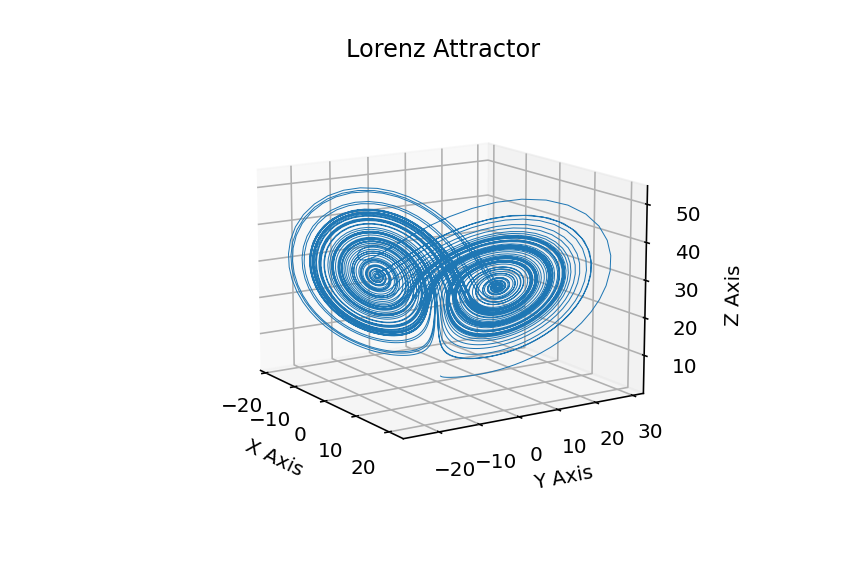

In [212]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
#plt.plot(range(num_steps+1), zs)
plt.show()

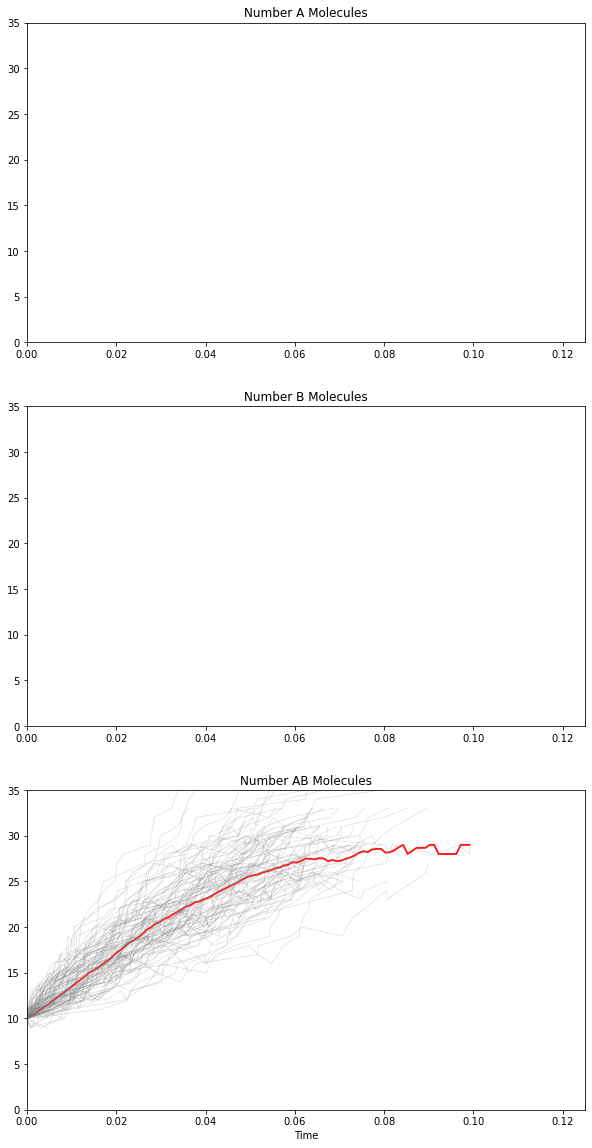

In [103]:
#An implenetation of the Gillespie algorithm
# applied to a pair of reactions:
# A -> B
# B -> A + B

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fix random seed for repeatability
np.random.seed(123)

###### Fix model parameters ######
N_A0 = 100     # Initial number of A molecules
N_B0 = 100     # Initial number of B molecules
N_AB0 = 10     # Initial number of AB molecules

rf = 2        # Forward reaction rate
rb = 2        # Backwards reaction rate

steps = 25    # Number of reactions per trajectory
cycles = 100  # Number of trajectories iterated over

# Set up holder arrays
T = np.zeros((cycles, steps+1))
N_A = np.zeros((cycles, steps+1))
N_B = np.zeros((cycles, steps+1))
N_AB = np.zeros((cycles, steps+1))

# Store initial conditions
N_A[:,0] = N_A0
N_B[:,0] = N_B0
N_AB[:,0] = N_AB0

###### Main Code Loop ######
for i in range(cycles):
    for j in range(steps):
        # Calculate updated overall reaction rate
        R = rf * (N_A[i,j] + N_B[i,j]) + rb * N_AB[i,j]
        
        # Calculate time to next reaction
        u1 = np.random.random()
        tau = 1/R * np.log(1/u1)
        
        # Store reaction time
        T[i, j+1] = T[i,j] + tau
        
        # Select which reaction to occur
        Rf = rf * (N_A[i,j] + N_B[i,j]) / R
        u2 = np.random.random()
        
        # Update populations
        if u2 < Rf:
            N_A[i,j+1] = N_A[i,j] - 1
            N_B[i,j+1] = N_B[i,j] - 1
            N_AB[i,j+1] = N_AB[i,j] + 1
        else:
            N_A[i,j+1] = N_A[i,j] + 1
            N_B[i,j+1] = N_B[i,j] + 1
            N_AB[i,j+1] = N_AB[i,j] - 1

# Calculate an average trajectory plot
ave_steps = 100
T_max = T.max()

# Set up average arrays
T_ave = np.linspace(0,T_max,ave_steps+1)
N_A_ave = np.zeros(ave_steps+1)
N_B_ave = np.zeros(ave_steps+1)
N_AB_ave = np.zeros(ave_steps+1)

N_A_ave[0] = N_A0
N_B_ave[0] = N_B0
N_AB_ave[0] = N_AB0

# Pass over average array entries
for i in range(1, ave_steps+1):
    tmax = T_ave[i]
    A_sum = 0
    B_sum = 0
    AB_sum = 0
    t_count = 0
    
    # Pass over each trajectory and step therein
    for j in range(cycles):
        for k in range(steps):
            if T[j,k] <= tmax and T[j,k+1] > tmax:
                t_count += 1
                A_sum += N_A[j,k]
                B_sum += N_B[j,k]
                AB_sum += N_AB[j,k]
    
    # Caclulate average - taking care if no samples observed
    if t_count == 0:
        N_A_ave[i] = N_A_ave[i-1]
        N_B_ave[i] = N_B_ave[i-1]
        N_AB_ave[i] = N_AB_ave[i-1]
    else:
        N_A_ave[i] = A_sum / t_count
        N_B_ave[i] = B_sum / t_count
        N_AB_ave[i] = AB_sum / t_count


###### Plot Trajectories ######
fig, axs = plt.subplots(3, 1, figsize=(10,20))

# Plot average trajectories
axs[0].plot(T_ave, N_A_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
axs[0].set_title('Number A Molecules')
axs[0].set_ylim((0,35))
axs[0].set_xlim((0,0.125))
axs[1].plot(T_ave, N_B_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
axs[1].set_title('Number B Molecules')
axs[1].set_ylim((0,35))
axs[1].set_xlim((0,0.125))
axs[2].plot(T_ave, N_AB_ave, marker='', color='red', linewidth=1.9, alpha=0.9)
axs[2].set_title('Number AB Molecules')
axs[2].set_xlabel("Time")
axs[2].set_ylim((0,35))
axs[2].set_xlim((0,0.125))

# Plot each simulated trajectory
for i in range(cycles):
    axs[0].plot(T[i,:], N_A[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[1].plot(T[i,:], N_B[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)
    axs[2].plot(T[i,:], N_AB[i,:], marker='', color='grey', linewidth=0.6, alpha=0.3)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


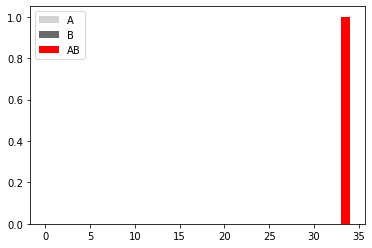

In [101]:
time = 0.025
N_A_time = np.zeros(cycles)
N_B_time = np.zeros(cycles)
N_AB_time = np.zeros(cycles)

for i in range(cycles):
    for j in range(1, steps+1):
        if T[i,j] >= time and T[i,j-1] < time:
            N_A_time[i] = N_A[i,j]
            N_B_time[i] = N_B[i,j]
            N_AB_time[i] = N_AB[i,j]
    if T[i, steps] < time:
        N_A_time[i] = N_A[i, steps]
        N_B_time[i] = N_B[i, steps]
        N_AB_time[i] = N_AB[i, steps]

plt.hist(N_A_time, density=True, bins=np.arange(35), label="A", color='lightgrey')
plt.hist(N_B_time, density=True, bins=np.arange(35), label="B", color='dimgrey')
plt.hist(N_AB_time, density=True, bins=np.arange(35), label="AB", color='red')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


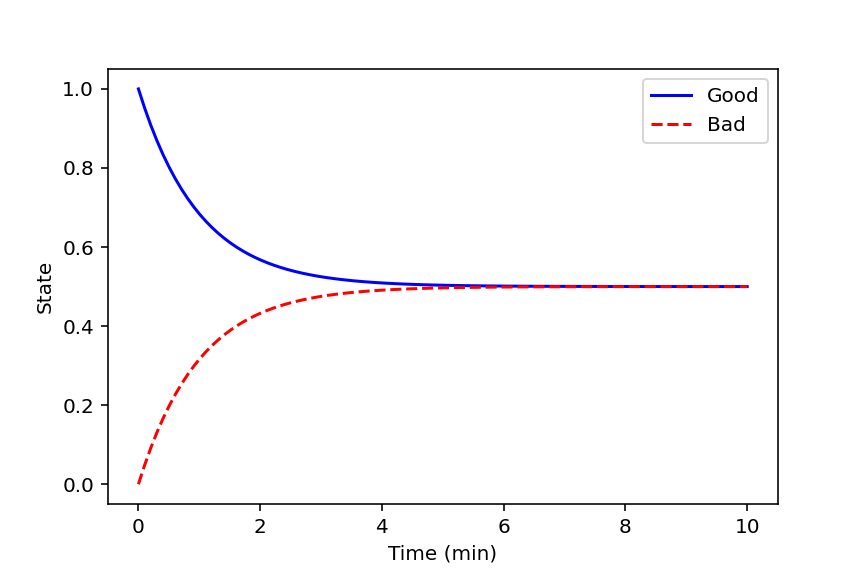

In [255]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random 

def eq2(theta,t=0):
    #parameters
    G, B = theta
    #print(x,G,B)
    R1 = 1/2
    R2 = 1/2
    C = 0
    D = 0
    I1 = 0
    I2 = 0
  
    dGdt = B*(R2-I1) + G*(C - R1)
    dBdt = G*(R1-I2) + B*(D - R2)
        
    return [dGdt, dBdt]
    

# integrate the equations
t = np.linspace(0,10,100) # times to report solution
# initial conditions for height


B0 = 0
G0 = 1

y0 =[G0, B0]

y = odeint(eq2,y0,t) # integrate

# plot results
plt.figure(1)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
#plt.plot(t,y[:,2],'g--')
plt.xlabel('Time (min)')
plt.ylabel('State')
plt.legend(['Good','Bad'])
plt.show()

<IPython.core.display.Javascript object>


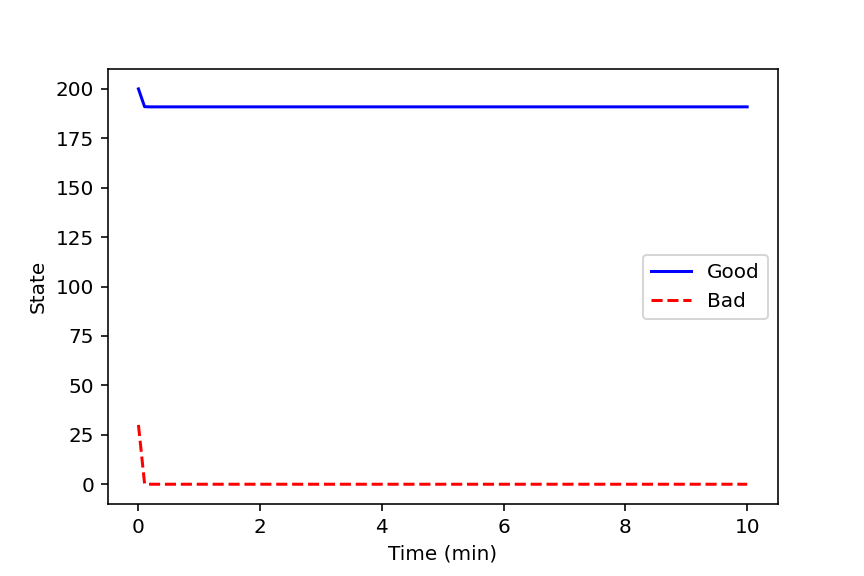

<IPython.core.display.Javascript object>


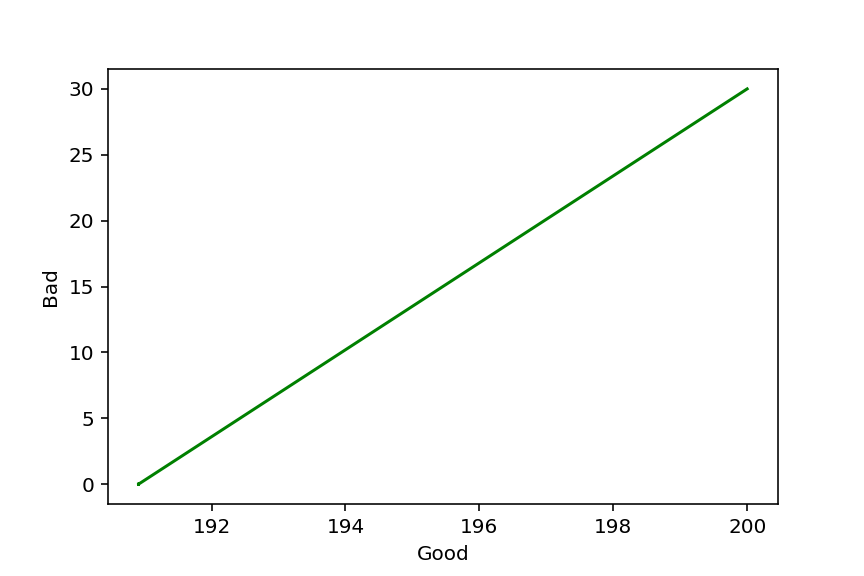

In [304]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random 

def eq3(theta,t=0):
    #parameters
    G, B = theta
    #print(x,G,B)
    
    delta = 1/20
    Delta = 1/8
    alpha = 1/2
    beta = 1/4
    
    #ODE
    
    dGdt = G*(delta*B - Delta*B)
    dBdt = B*(alpha - beta*G)
        
    return [ dGdt, dBdt]
    

# integrate the equations
t = np.linspace(0,10,100) # times to report solution
# initial conditions for height


B0 = 30
G0 = 200

y0 =[G0, B0]

y = odeint(eq3,y0,t) # integrate

# plot results
plt.figure()
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
#plt.plot(t,y[:,2],'g--')
plt.xlabel('Time (min)')
plt.ylabel('State')
plt.legend(['Good','Bad'])
plt.show()


plt.figure()
plt.plot(y[:,0],y[:,1],'g-')
#plt.plot(t,y[:,2],'g--')
plt.xlabel('Good')
plt.ylabel('Bad')
plt.show()

<IPython.core.display.Javascript object>


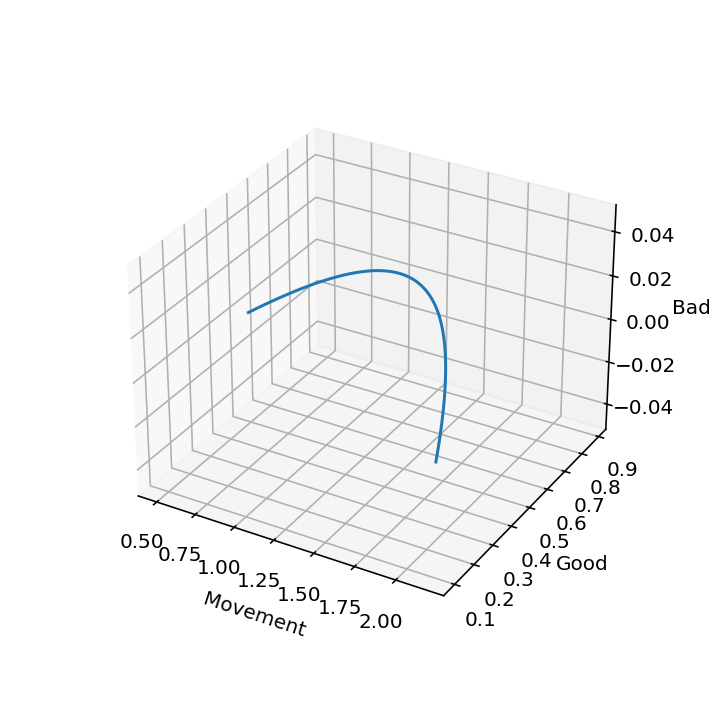

Text(0.5, 0, 'Bad')

In [311]:
s = np.random.normal(0, 1, 1)
s[0]

-0.5255769478090521